In [1]:
# --- Setup ---
import sys, os

# autoreload so that transformer.py updates automatically
%load_ext autoreload
%autoreload 2

# make sure repo root is on path
sys.path.append(os.path.abspath(".."))

# imports
import torch
import matplotlib.pyplot as plt
from models.transformer import TinyTransformerBlock


In [2]:
x = torch.randn(1, 6, 64)  # batch=1, seq_len=6
model = TinyTransformerBlock(d_model=64, num_heads=4, dim_ff=128)

out, attn = model(x, return_attn=True)
print(out.shape)    # (1, 6, 64)
print(attn.shape)   # (1, 4, 6, 6)



torch.Size([1, 6, 64])
torch.Size([1, 4, 6, 6])


In [3]:
def plot_all_heads(attn, sample_idx=0):
    """
    Plots all attention heads for a given sample.
    attn shape: (batch, heads, seq_len, seq_len)
    """
    num_heads = attn.shape[1]
    fig, axes = plt.subplots(1, num_heads, figsize=(4*num_heads, 4))

    for h in range(num_heads):
        ax = axes[h] if num_heads > 1 else axes
        ax.imshow(attn[sample_idx, h].detach().numpy(), cmap="viridis")
        ax.set_title(f"Head {h}")
        ax.set_xlabel("Key tokens")
        ax.set_ylabel("Query tokens")

    plt.tight_layout()
    plt.show()

Output shape: torch.Size([1, 6, 64])
Attention shape: torch.Size([1, 4, 6, 6])


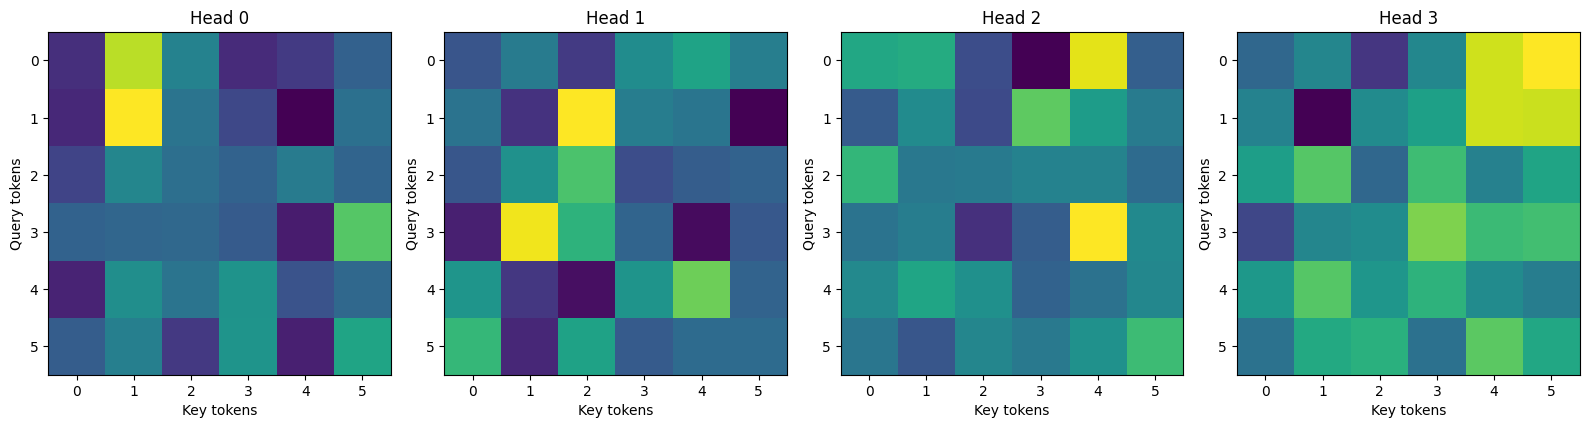

In [4]:
x = torch.randn(1, 6, 64)   # batch=1, seq_len=6
model = TinyTransformerBlock(d_model=64, num_heads=4, dim_ff=128)

out, attn = model(x, return_attn=True)
print("Output shape:", out.shape)
print("Attention shape:", attn.shape)  # (1, heads, 6, 6)

plot_all_heads(attn)


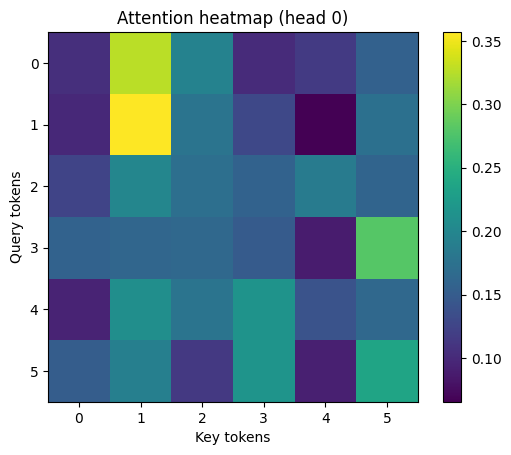

In [5]:
head = 0
plt.imshow(attn[0, head].detach().numpy(), cmap="viridis")
plt.colorbar()
plt.title(f"Attention heatmap (head {head})")
plt.xlabel("Key tokens")
plt.ylabel("Query tokens")
plt.show()